In [2]:
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [139]:
def ave_abs_loss(df, minus=0):
    df_found = df.query('not time == "TimeOut"')
    real_val = df_found["tw"].to_numpy()
    est_val = df_found["evaltw"].to_numpy() - minus

    
    return np.average(np.absolute(est_val - real_val)), np.max(np.absolute(est_val - real_val))

In [203]:
df1 = pd.read_csv("both_5_sum_sum_BinaryClassification.dat", delimiter='\t')
df2 = pd.read_csv("both_7_sum_sum_BinaryClassification.dat", delimiter='\t')
df3 = pd.read_csv("both_9_sum_sum_BinaryClassification.dat", delimiter='\t')

print(ave_abs_loss(df1, 1), ave_abs_loss(df2, 1), ave_abs_loss(df3, 1))

(2.2222222222222223, 8.0) (2.2666666666666666, 8.0) (2.0, 8.0)


In [204]:
df1 = pd.read_csv("lower_5_sum_sum_BinaryClassification.dat", delimiter='\t')
df2 = pd.read_csv("lower_7_sum_sum_BinaryClassification.dat", delimiter='\t')
df3 = pd.read_csv("lower_9_sum_sum_BinaryClassification.dat", delimiter='\t')

print(ave_abs_loss(df1, 1), ave_abs_loss(df2, 1), ave_abs_loss(df3, 1))

(1.625, 5.0) (1.5, 4.0) (0.625, 2.0)


In [205]:
df1 = pd.read_csv("upper_5_sum_sum_BinaryClassification.dat", delimiter='\t')
df2 = pd.read_csv("upper_7_sum_sum_BinaryClassification.dat", delimiter='\t')
df3 = pd.read_csv("upper_9_sum_sum_BinaryClassification.dat", delimiter='\t')

print(ave_abs_loss(df1), ave_abs_loss(df2), ave_abs_loss(df3))

(0.2, 1.0) (0.1111111111111111, 1.0) (0.1111111111111111, 1.0)


In [18]:
df1 = pd.read_csv("both_5_sum_sum_BinaryClassification.dat", delimiter='\t')
df1 = df1.query('not time == "TimeOut"')
df1["evaltw"] = df1["evaltw"] - 1 # have to execute this lower and both 
df1 = df1.drop("ID", axis=1)

In [19]:
len(df1.query('prunenum > 0'))

15

In [15]:
df2 = pd.read_csv("lower_5_sum_sum_BinaryClassification.dat", delimiter='\t')
df2 = df2.query('not time == "TimeOut"')
df2["evaltw"] = df2["evaltw"] - 1 # have to execute this lower and both 
df2 = df2.drop("ID", axis=1).drop('|V|', axis=1).drop("|E|", axis=1).drop("tw", axis=1)

In [16]:
len(df2.query('prunenum > 0'))

5

In [255]:
df3 = pd.read_csv("upper_5_sum_sum_BinaryClassification.dat", delimiter='\t')
df3 = df3.query('not time == "TimeOut"')
df3 = df3.drop("ID", axis=1).drop('|V|', axis=1).drop("|E|", axis=1).drop("tw", axis=1)

In [17]:
df3.query('prunenum > 0')

NameError: name 'df3' is not defined

In [260]:
df_ord = pd.read_csv("ord_DP_sum_sum_BinaryClassification.dat", delimiter='\t')
df_ord = df_ord.query('not time == "TimeOut"')
df_ord["evaltw"] = df_ord["evaltw"] - 1 # have to execute this lower and both 
df_ord = df_ord.drop("ID", axis=1).drop('|V|', axis=1).drop("|E|", axis=1).drop("tw", axis=1)
print(len(df_ord))

9


In [249]:
df_v_in = pd.concat([df1, df2, df3, df_ord], join='inner', axis=1)
df_v_in

,|V|,|E|,tw,time,evaltw,prunenum,funccallnum,evalGNNtime,time,evaltw,prunenum,funccallnum,evalGNNtime,time,evaltw,prunenum,funccallnum,evalGNNtime,time,evaltw,funccallnum
1,10,25,5.0,4.6550610065460205,3.0,1.0,595.0,4.485630,4.559659004211426,3.0,1.0,595.0,4.385931,12.424314260482788,5.0,0.0,2828.0,12.011905,0.3376901149749756,5.0,4728.0
4,10,32,6.0,0.14494585990905762,5.0,5.0,7.0,0.144667,9.779730081558228,4.0,1.0,1867.0,9.305315,15.087620973587036,6.0,0.0,3879.0,14.567355,0.572840690612793,6.0,8273.0
25,9,30,6.0,0.24819302558898926,5.0,5.0,35.0,0.244163,3.22005295753479,3.0,1.0,422.0,3.130581,8.07921314239502,6.0,0.0,2012.0,7.803773,0.2776315212249756,6.0,4716.0
28,13,30,3.0,9.067449569702148,3.0,0.0,1548.0,8.497282,11.38636827468872,3.0,0.0,1548.0,10.646956,12.900477886199951,3.0,0.0,1641.0,12.218380,0.29578089714050293,3.0,1548.0
33,15,16,2.0,2.4202187061309814,2.0,0.0,376.0,2.286427,3.333850383758545,2.0,0.0,376.0,3.081633,5.869269847869873,2.0,0.0,556.0,5.620090,0.08192944526672363,2.0,376.0
35,14,80,10.0,0.9591560363769531,7.0,7.0,83.0,0.894275,109.03337693214417,5.0,1.0,22372.0,97.757014,287.8694050312042,10.0,0.0,109454.0,267.033130,40.62552881240845,10.0,402916.0
38,24,23,1.0,0.5272786617279053,1.0,0.0,46.0,0.444152,0.6932835578918457,1.0,0.0,46.0,0.627885,10.1383056640625,2.0,0.0,805.0,9.572774,0.024300336837768555,1.0,46.0
40,11,18,4.0,5.73015284538269,3.0,1.0,909.0,5.499749,5.655117988586426,3.0,1.0,909.0,5.361710,15.424558401107788,4.0,0.0,3207.0,14.662740,0.34940552711486816,4.0,4019.0


,time,evaltw,funccallnum
1,0.3376901149749756,5.0,4728.0
4,0.572840690612793,6.0,8273.0
25,0.2776315212249756,6.0,4716.0
28,0.29578089714050293,3.0,1548.0
32,61.76693344116211,12.0,630809.0
33,0.08192944526672363,2.0,376.0
35,40.62552881240845,10.0,402916.0
38,0.024300336837768555,1.0,46.0
40,0.34940552711486816,4.0,4019.0


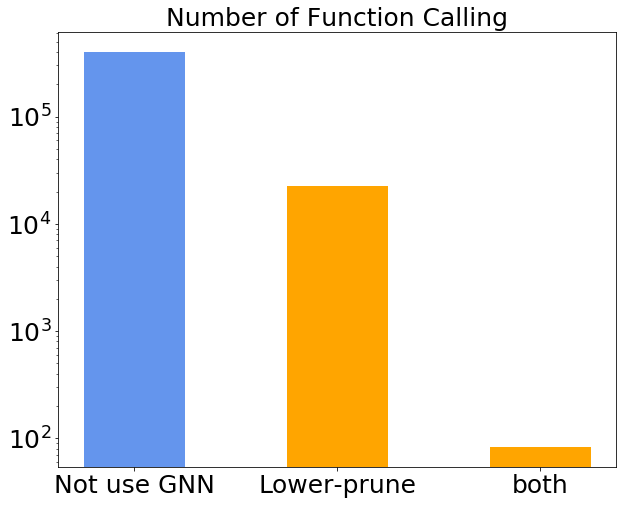

In [11]:
plt.rcParams['figure.figsize'] = 10, 8

plt.tick_params(labelsize=25)
label = ["Not use GNN", "Lower-prune", "both"]
y = [402916, 22372,  83]
plt.bar([1, 3, 5], y, width=1, tick_label=label, color=["cornflowerblue", "orange", "orange"])
plt.title('Number of Function Calling', fontsize=25)
plt.yscale('log')
plt.show()

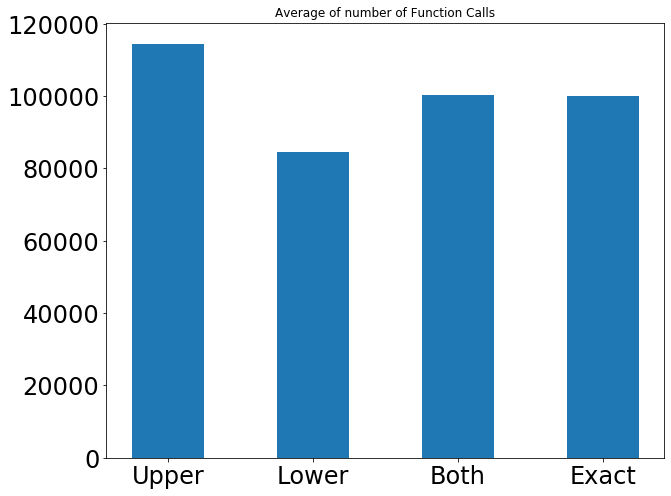

In [6]:
plt.tick_params(labelsize=24)
label = ["Upper", "Lower", "Both", "Exact"]
plt.bar([1, 2, 3, 4], [114521.0, 84561.0, 100300, 100000], width=0.5, tick_label=label)
plt.title('Average of number of Function Calls')
plt.show()

In [171]:
7	8273	3879	1867

,ID,|V|,|E|,tw,time,evaltw,funccallnum
1,1,10,25,5.0,0.3376901149749756,5.0,4728.0
4,4,10,32,6.0,0.572840690612793,6.0,8273.0
25,25,9,30,6.0,0.2776315212249756,6.0,4716.0
28,28,13,30,3.0,0.29578089714050293,3.0,1548.0
32,32,14,89,12.0,61.76693344116211,12.0,630809.0
33,33,15,16,2.0,0.08192944526672363,2.0,376.0
35,35,14,80,10.0,40.62552881240845,10.0,402916.0
38,38,24,23,1.0,0.024300336837768555,1.0,46.0
40,40,11,18,4.0,0.34940552711486816,4.0,4019.0


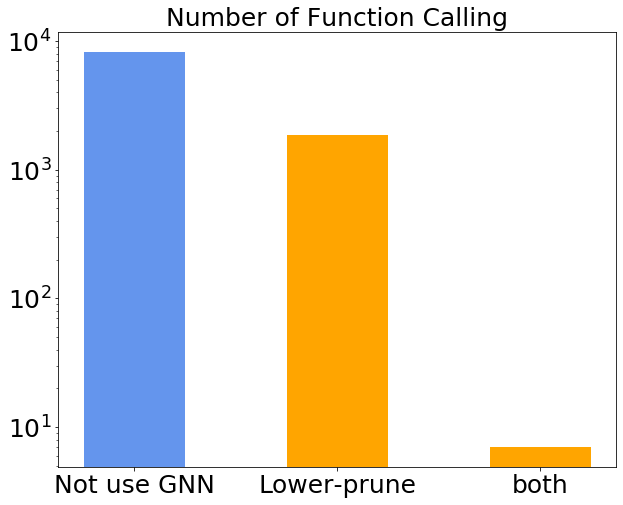

In [13]:
plt.rcParams['figure.figsize'] = 10, 8

plt.tick_params(labelsize=25)
label = ["Not use GNN", "Lower-prune", "both"]
y = [8273, 1867,  7]
plt.bar([1, 3, 5], y, width=1, tick_label=label, color=["cornflowerblue", "orange", "orange"])
plt.title('Number of Function Calling', fontsize=25)
plt.yscale('log')
plt.show()